In [12]:
pip uninstall MARS --y

Found existing installation: MARS 1.0.0
Uninstalling MARS-1.0.0:
  Successfully uninstalled MARS-1.0.0
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install git+https://github.com/bianchimario/MARS

  Cloning https://github.com/bianchimario/MARS to /private/var/folders/kj/2bfwcpp56ljb52n904gv1_700000gn/T/pip-req-build-bss1mxwk
  Running command git clone --filter=blob:none --quiet https://github.com/bianchimario/MARS /private/var/folders/kj/2bfwcpp56ljb52n904gv1_700000gn/T/pip-req-build-bss1mxwk
  Resolved https://github.com/bianchimario/MARS to commit 5087111f2a4b3f9c3ba8dd4a5de2069815503b59
  Preparing metadata (setup.py) ... done
  Created wheel for MARS: filename=MARS-1.0.0-py3-none-any.whl size=14359 sha256=ccb8284e8775fb417f1c8d3f9689f4c8bdff4a394585a90c9a0f560ce835b149
  Stored in directory: /private/var/folders/kj/2bfwcpp56ljb52n904gv1_700000gn/T/pip-ephem-wheel-cache-2q5oknmv/wheels/7c/54/7a/9a1b3a604937feb86544be13c30bf12c1ee3b43b898c4a6af9
Successfully built MARS
Note: you may need to restart the kernel to use updated packages.


In [2]:
from downtime import load_dataset
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import classification_report
from .MARS import get_shapelets, get_distances  
import numpy as np

ImportError: attempted relative import with no known parent package

# Getting the data

In [3]:
d = load_dataset("SelfRegulationSCP1")

X_train = d.X_train
X_test = d.X_test
y_train = d.y_train
y_test = d.y_test

In [4]:
print(d)

X_train: (268, 6, 896)
X_test: (293, 6, 896)
y_train: (268,)
y_test: (293,)
Metadata:
{'labels': {'0': 'negativity', '1': 'positivity'},
 'name': 'SelfRegulationSCP1',
 'task': 'classification'}


In [20]:
X_train

<Array [[[23, 21.7, ..., 21.5], ...], ...] type='268 * var * var * float64'>

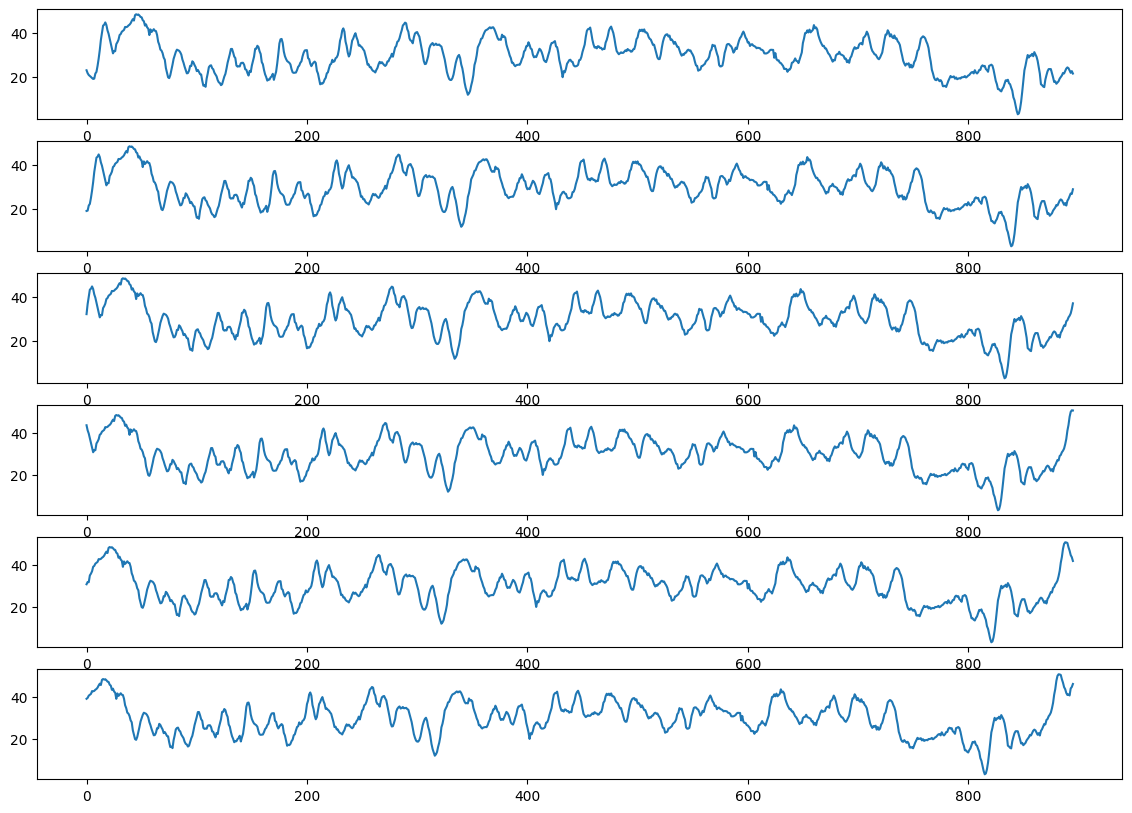

In [4]:
plt.figure(figsize=(14,10))

for i,dim in enumerate(d.X_train[0]):
    plt.subplot(6,1,i+1)
    plt.plot(dim)

# Multivariate Asynchronous Random Shapelets

In [5]:
# Getting shapelets
shapelets = get_shapelets(X_train, num_shapelets=1, len_shapelets=20, async_shapelets=True, seed=10)

NameError: name 'get_shapelets' is not defined

In [92]:
shapelets[0]

[<Array [33.9, 32.7, 31.1, 31.8, ..., 34.1, 34.8, 34.9] type='20 * float64'>,
 <Array [43.8, 44.4, 45.5, 46.3, ..., 42.6, 42, 39.1, 41.7] type='20 * float64'>,
 <Array [33, 34.7, 38.3, 41, ..., 33.2, 32.4, 32.8, 32.7] type='20 * float64'>,
 <Array [37, 35.8, 34.6, 34.7, ..., 38.4, 38.8, 36.8, 37.1] type='20 * float64'>,
 <Array [30.7, 30.7, 30.7, 31, ..., 25.7, 25, 23.6, 23.7] type='20 * float64'>,
 <Array [48.6, 48.3, 48.5, 48, ..., 41.8, 41, 40.9, 39.1] type='20 * float64'>]

In [93]:
print('268 instances * 5 shapelets = ', len(shapelets), 'shapelets')
print('Num. dimensions = ', len(shapelets[0]))
print('Length of each shapelet dimension = ', len(shapelets[0][0]))

268 instances * 5 shapelets =  1340 shapelets
Num. dimensions =  6
Length of each shapelet dimension =  20


In [94]:
from scipy.spatial import distance

def get_distance(time_series, shapelet): # distance between univariate time series and shapelet
    max_idx = len(time_series) - len(shapelet)
    min_dist = float('inf')
    
    for i in range(0, max_idx):
        dist = distance.euclidean(time_series[i:i+len(shapelet)], shapelet) # euclidean distance
        if dist < min_dist:
            min_dist = dist

    return min_dist


def get_distances(time_series_dataset, shapelets):
    dims = len(time_series_dataset[0])

    distances_dataset = []

    for ts in time_series_dataset:
        ts_distances = [] # list of distances from a time series to all the shapelets
        for shapelet in shapelets:
            tot_dist = 0 # distance from ts to single shapelet
            for dim in range(0,dims):
                dim_dist = get_distance(ts[dim],shapelet[dim]) # distance on each dimension
                tot_dist += dim_dist
            ts_distances.append(tot_dist)
        distances_dataset.append(ts_distances)

    return distances_dataset

In [95]:
ts = [3,4,1,4,-6,7,8,9,1,-4,3]
sh = [3,4,0]

min = get_distance(ts,sh)
min

1.0

In [96]:
ts = [[3,4,1,4],[-6,7,8,9],[1,-4,3,0]]
ts_dataset = [ts,ts]

sh = [[3,4],[1,2],[-3,-2]]
sh_dataset = [sh,sh]

In [97]:
dists = get_distances(ts_dataset,sh_dataset)
dists

[[12.95741732923815, 12.95741732923815],
 [12.95741732923815, 12.95741732923815]]

In [98]:
# Transforming training set (getting distances from shapelets)
X_train_transformed = get_distances(X_train, shapelets)

KeyboardInterrupt: 

In [ ]:
X_train_transformed

[[inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,

In [36]:
print(len(X_train_transformed))
print(len(X_train_transformed[0]))


1340
268


TypeError: object of type 'float' has no len()

In [15]:
X_test_transformed = transform(shapelets, X_test)

# Classification

In [16]:
clf = lgb.LGBMClassifier()
clf.fit(X_train_transformed, y_train)

ValueError: Found array with 0 feature(s) (shape=(359120, 0)) while a minimum of 1 is required.

## Training set

In [ ]:
y_pred_train = clf.predict(X_train_transformed)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       135
           1       0.99      0.97      0.98       133

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



## Test set

In [ ]:
y_pred_test = clf.predict(X_test_transformed)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       147
           1       0.70      0.83      0.76       146

    accuracy                           0.74       293
   macro avg       0.75      0.74      0.74       293
weighted avg       0.75      0.74      0.74       293

